In [ ]:
import pandas as pd
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn import tree
# grab cross validation code
from sklearn.model_selection import cross_val_score, KFold,train_test_split
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving caesarian.csv to caesarian.csv


In [ ]:
uploaded = io.BytesIO(uploaded['caesarian.csv'])

In [ ]:
df = pd.read_csv(uploaded)
df.head()

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,False
1,26,2,0,1,0,True
2,26,2,1,1,0,False
3,28,1,0,2,0,False
4,22,2,0,1,0,True


In [ ]:
df.shape #remember 80%

(78, 6)

In [ ]:
print(df.columns)

Index(['Age', 'Delivery number', 'Delivery time', 'Blood of Pressure',
       'Heart Problem', 'Caesarian'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df['Caesarian'] = Le.fit_transform(df['Caesarian'])

In [ ]:
for c in df.columns:
    df[c].fillna(0,inplace = True)

<ipython-input-8-eda19aed6623>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(0,inplace = True)


In [ ]:
features = df.drop('Caesarian', axis=1)

In [ ]:
target = df.Caesarian

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
# set up the tree model object
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

# fit the model on the training set of data
dtree.fit(X_train, y_train)

# Prediction using Training data
pred_train = dtree.predict(X_train)
# Prediction using Testing data
pred_test = dtree.predict(X_test)

# Train results: evaluate the model on the training set of data
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, pred_train)))

# Test results: evaluate the model on the testing set of data
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, pred_test)))

Train Accuracy: 0.65
Test Accuracy: 0.69


## This is the low complexity model

[Ellipsis]

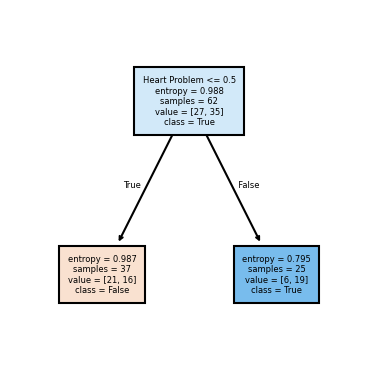

In [ ]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(3,3), dpi=150)
plot_tree(dtree, fontsize=4, filled=True,
               max_depth=3,
               feature_names= features.columns,
               class_names = ['False','True'],

)
[...]

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dtree.fit(X_train, y_train)
pred_train = dtree.predict(X_train)
pred_test = dtree.predict(X_test)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, pred_train)))
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, pred_test)))

Train Accuracy: 0.87
Test Accuracy: 0.75


## This is the medium complexity model

[Ellipsis]

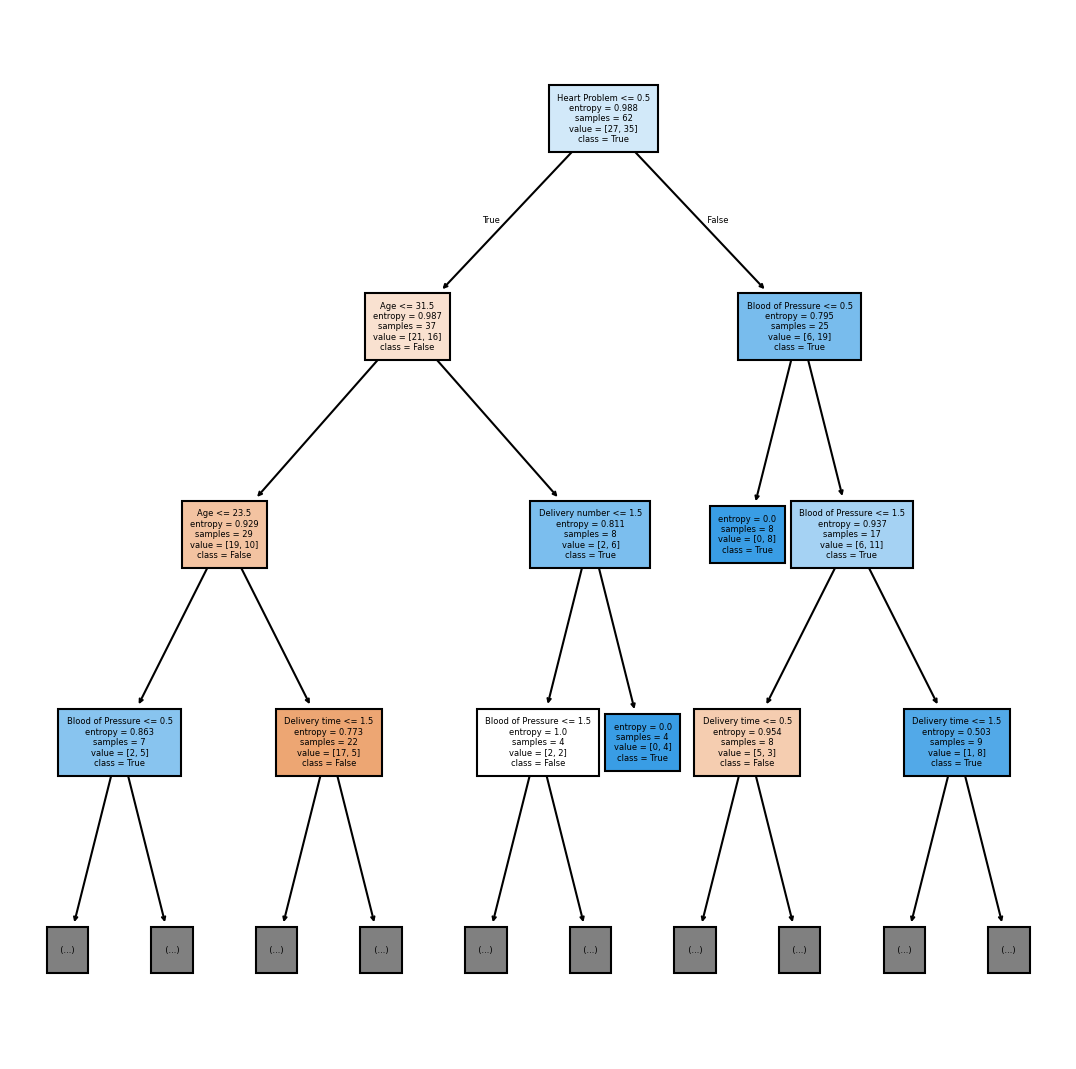

In [ ]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9,9), dpi=150)
plot_tree(dtree, fontsize=4, filled=True,
               max_depth=3,
               feature_names= features.columns,
               class_names= ['False','True'])
[...]

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth = None, random_state=42)
dtree.fit(X_train, y_train)
pred_train = dtree.predict(X_train)
pred_test = dtree.predict(X_test)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, pred_train)))
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, pred_test)))

Train Accuracy: 1.00
Test Accuracy: 0.50


## This is the high complexity model

[Ellipsis]

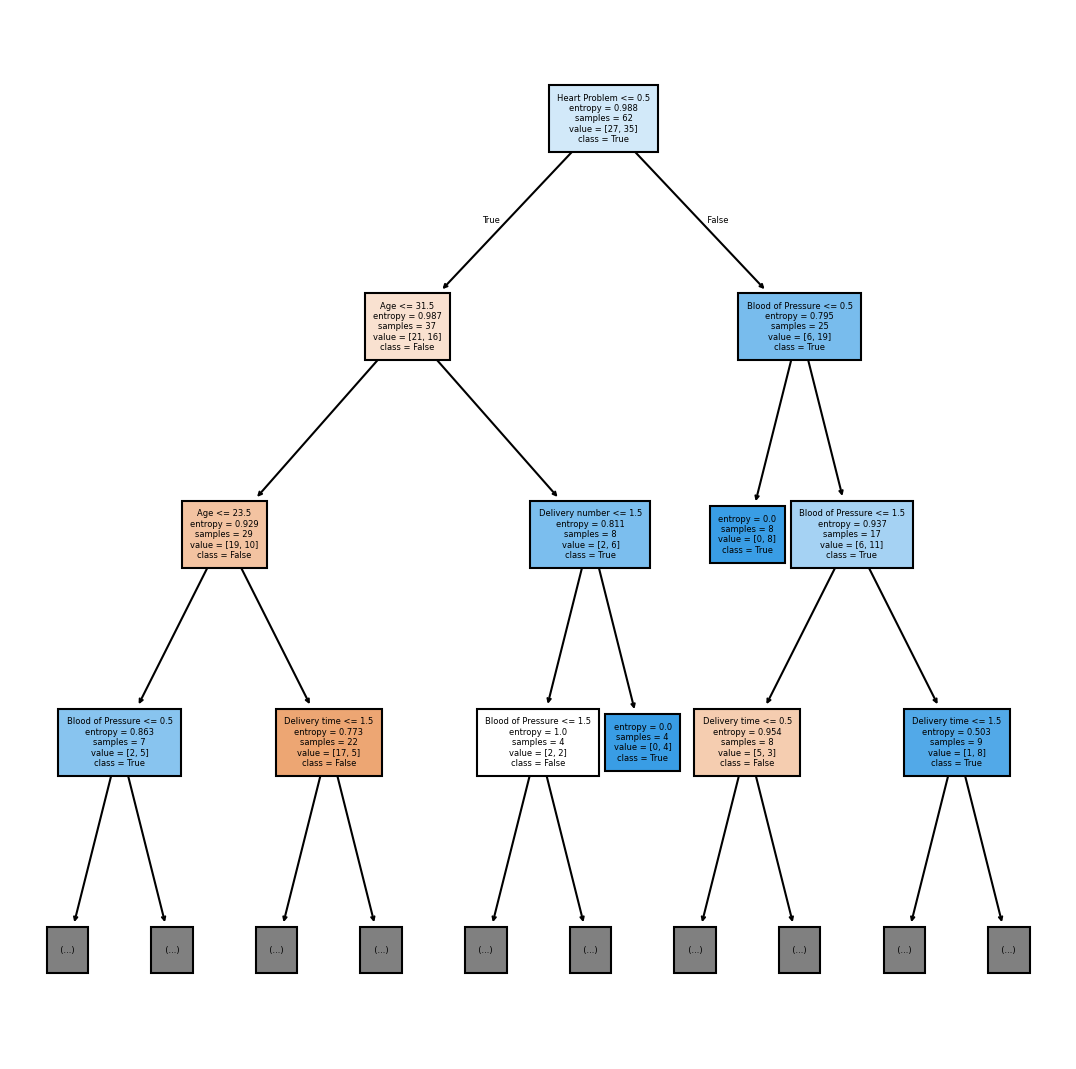

In [ ]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9,9), dpi=150)
plot_tree(dtree, fontsize=4, filled=True,
               max_depth=3,
               feature_names= features.columns,
               class_names= ['False', 'True'])
[...]

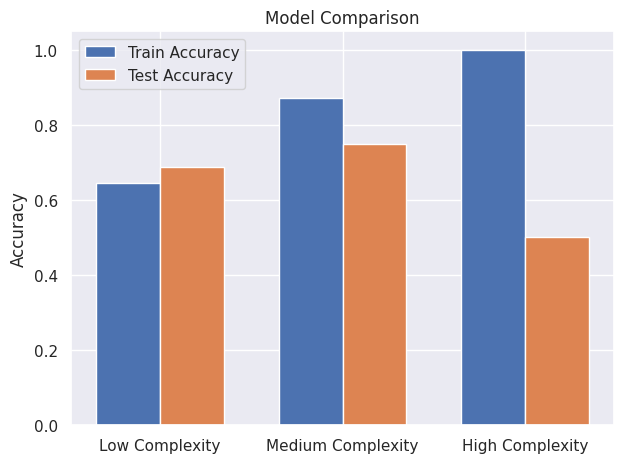

In [ ]:
# Function to train and evaluate a model
def evaluate_model(max_depth):
  dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
  dtree.fit(X_train, y_train)
  pred_train = dtree.predict(X_train)
  pred_test = dtree.predict(X_test)
  train_accuracy = accuracy_score(y_train, pred_train)
  test_accuracy = accuracy_score(y_test, pred_test)
  return train_accuracy, test_accuracy, dtree

# Low complexity model
train_acc_low, test_acc_low, dtree_low = evaluate_model(1)

# Medium complexity model
train_acc_med, test_acc_med, dtree_med = evaluate_model(5)

# High complexity model
train_acc_high, test_acc_high, dtree_high = evaluate_model(None)

# Comparing the models graphically
models = ['Low Complexity', 'Medium Complexity', 'High Complexity']
train_accuracies = [train_acc_low, train_acc_med, train_acc_high]
test_accuracies = [test_acc_low, test_acc_med, test_acc_high]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Train Accuracy')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()


Question: Check for overfitting by comparing their train and test accuracy scores(and/or other model metrics) graphically.

Which model is overfitting and which one is underfitting? Why?

Model Analysis/Answers:
The high complexity model is likely overfitting because it has a perfect train accuracy but lower test accuracy. This suggests it's memorizing the training data and failing to generalize well to new data.

The low complexity model might be underfitting as it has lower accuracy for both training and testing. This means the model is too simple to capture the underlying patterns in the data.

The medium complexity model appears to be a good balance between bias and variance, providing decent accuracy on both train and test sets.

In [ ]:
# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

# set up the model
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

# do the 5-fold cross validation
scores = cross_val_score(dtree, X_train, y_train,cv=cv)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

Fold Accuracies: [0.62 0.46 0.42 0.58 0.58]
Accuracy: 0.53


In [ ]:
from sklearn.model_selection import GridSearchCV

# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

# setting up grid search
model = tree.DecisionTreeClassifier()
param_grid = {
    'max_depth': list(range(1,11)), # search 1..10
    'criterion': ['entropy', 'gini']
    }
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search
grid.fit(X_train, y_train)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'criterion': 'entropy', 'max_depth': 3}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


#Question: What are the best model parameters from the grid search?

#Answer: The best model parameters are criterion, entropy, and max depth.

###This is the best decison tree model

[Ellipsis]

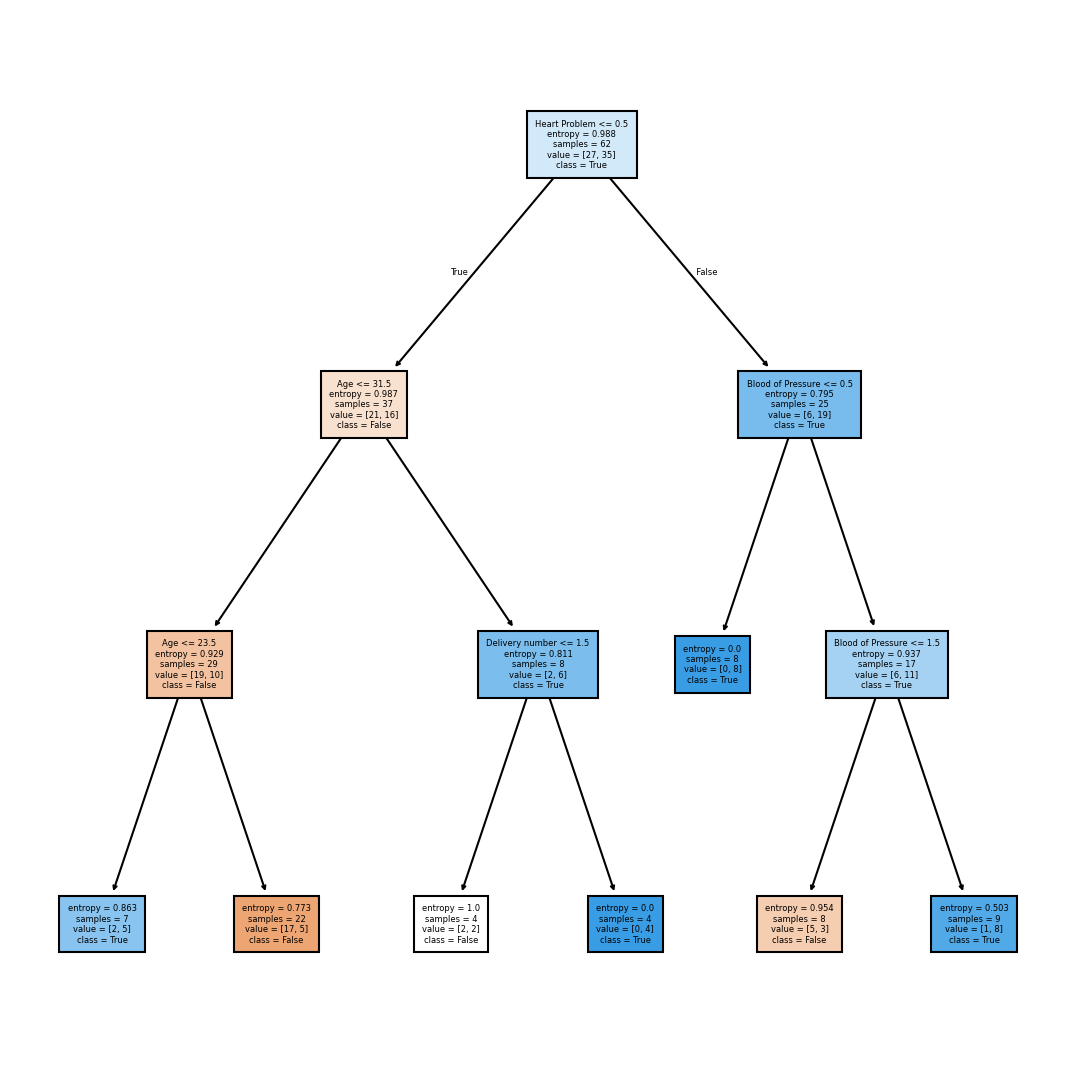

In [ ]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9,9), dpi=150)
plot_tree(grid.best_estimator_, fontsize=4, filled=True,
               max_depth=3,
               feature_names= features.columns,
               class_names= ['False','True'])
[...]

In [ ]:
# predicting
pred_test = grid.best_estimator_.predict(X_test)

from sklearn.metrics import accuracy_score
# accuracy of optimal classifier
print("Accuracy of optimal model: {:3.2f}".format(accuracy_score(y_test, pred_test)))

Accuracy of optimal model: 0.50


#Building the model and evaluating it

In [ ]:
from sklearn.metrics import confusion_matrix

# Get the unique labels from y_test
labels = pd.unique(y_test)

# Assuming y_test have values 0 and 1, map to ['B', 'M']
labels_map = {0: 'M', 1: 'B'} # Assuming 'B' corresponds to 0 and 'M' to 1
y_test_mapped = [labels_map[i] for i in y_test]
pred_test_mapped = [labels_map[i] for i in pred_test]

cm = confusion_matrix(y_test_mapped, pred_test_mapped, labels=list(labels_map.values()))

cm_df = pd.DataFrame(cm, index=list(labels_map.values()), columns=list(labels_map.values()))
print("Confusion Matrix:\n{}".format(cm_df))

Confusion Matrix:
   M  B
M  4  2
B  6  4


#Used my top three features from my decision tree to create a scatter plot

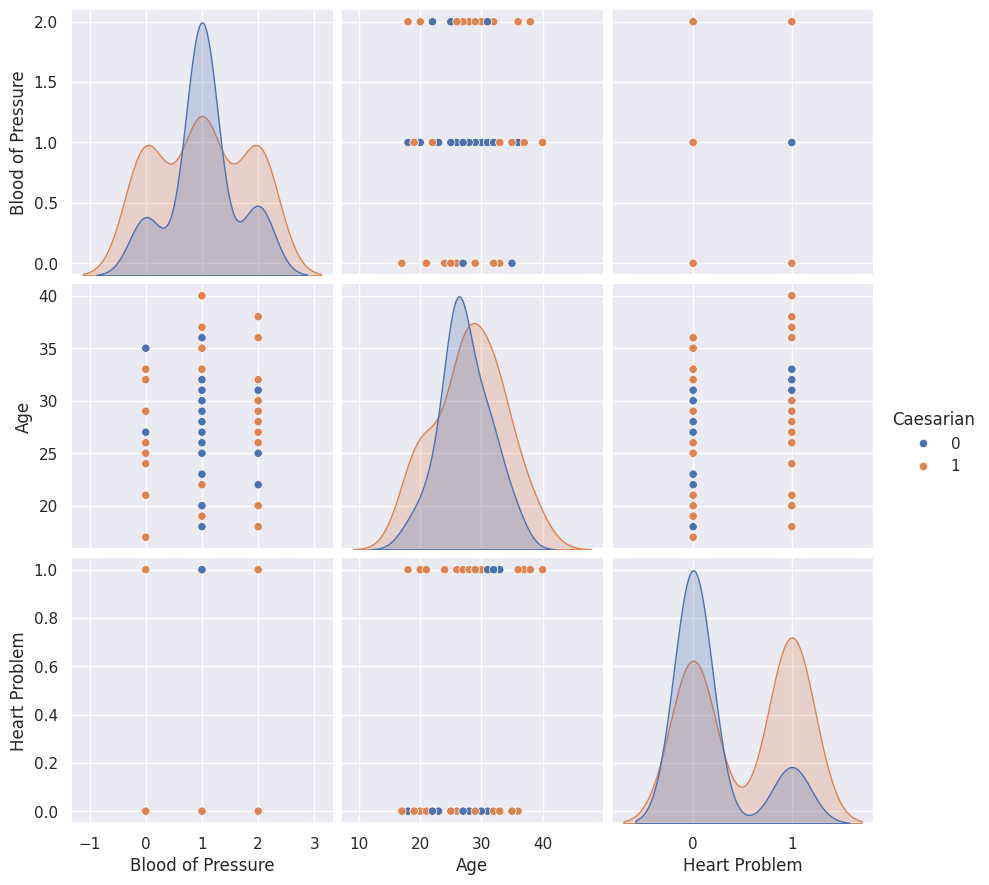

In [ ]:
import seaborn as sns
sns.set()
sns.pairplot(df, hue='Caesarian', height=3, vars=["Blood of Pressure", "Age", "Heart Problem"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, test_size=0.2, random_state=2)

In [ ]:
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

In [ ]:
pred_test = model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, pred_test)
observations = X_test.shape[0]


In [ ]:
# 95% confidence interval
lb,ub = classification_confint(acc, observations)
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

Accuracy: 0.56 (0.32,0.81)


#The confidence interval for the optimal parameters is 0.56

## Question 5: Compare the medium complexity and the best decision tree model and see if their cross-validation scores overlap. Which model will you choose? Discuss statistical significance.

In [ ]:
# Cross-validation on the medium complexity model
scores_med = cross_val_score(dtree_med, X_train, y_train, cv=5)

# Cross-validation on the best decision tree model
scores_best = cross_val_score(grid.best_estimator_, X_train, y_train, cv=5)

print("Medium Complexity Model Cross-Validation Scores:", scores_med)
print("Best Decision Tree Model Cross-Validation Scores:", scores_best)



Medium Complexity Model Cross-Validation Scores: [0.38 0.54 0.58 0.67 0.42]
Best Decision Tree Model Cross-Validation Scores: [0.46 0.54 0.67 0.75 0.42]


In [ ]:
# Calculate the confidence intervals for the medium complexity model
observations = X_train.shape[0]
acc_med = scores_med.mean()
lb_med, ub_med = classification_confint(acc_med, observations)
print("Medium Complexity Model Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc_med, lb_med, ub_med))

# Calculate the confidence intervals for the best model
acc_best = scores_best.mean()
lb_best, ub_best = classification_confint(acc_best, observations)
print("Best Decision Tree Model Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc_best, lb_best, ub_best))


Medium Complexity Model Accuracy: 0.52 (0.39,0.64)
Best Decision Tree Model Accuracy: 0.57 (0.44,0.69)


###Question: Compare the medium complexity and the best decision tree model and see if their cross-validation scores overlap. Which model will you choose? Discuss statistical significance.

###Answer: Given the overlap in the confidence intervals between the medium complexity model and the best decision tree model, I would choose the medium complexity model. The medium complexity model has a 95% confidence interval of (0.39, 0.64), while the best decision tree model has a slightly higher accuracy with a confidence interval of (0.44, 0.69). However, the overlap between these intervals suggests that the difference in their average accuracies (0.52 vs. 0.57) is not statistically significant. The medium complexity model is a better choice due to its likely simplicity and reduced risk of overfitting.